In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_excel("1673873388_rolling_stones_spotify (1).xlsx",index_col=0)

In [4]:
df.head()

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,Donâ€™t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [40]:
df.describe()

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6.971615,0.069512,126.082033,0.582165,20.788199,257736.488199
std,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,2.994003,0.051631,29.233483,0.231253,12.426859,108333.474920
min,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000
25%,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000
50%,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000
75%,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000
max,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-1.014000,0.624000,216.304000,0.974000,80.000000,981866.000000


In [2384]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[["energy","acousticness"]] = scaler.fit_transform(df[["energy","acousticness"]])

In [2385]:
df[["energy","acousticness"]]

,energy,acousticness
0,0.993007,0.082889
1,0.960373,0.439633
2,0.965035,0.418506
3,0.983683,0.570419
4,0.965035,0.402409
...,...,...
1605,0.921911,0.157940
1606,0.658508,0.057939
1607,0.737762,0.373234
1608,0.472028,0.218303


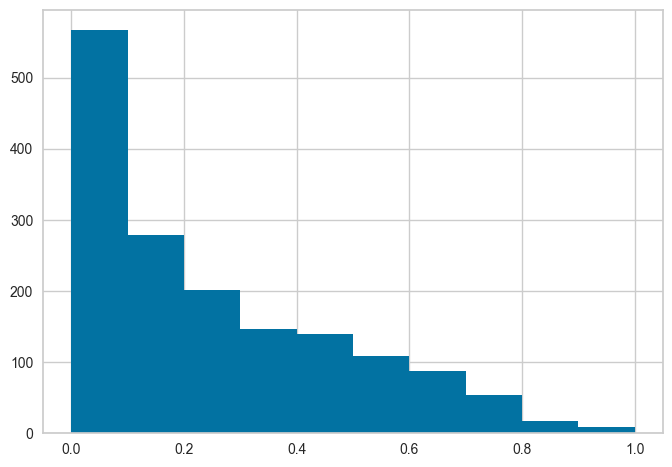

In [2386]:
plt.hist(df["acousticness"]);

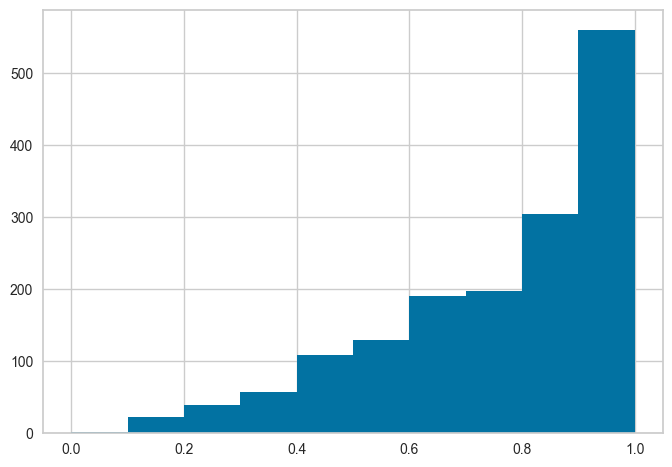

In [2387]:
plt.hist(df["energy"]);

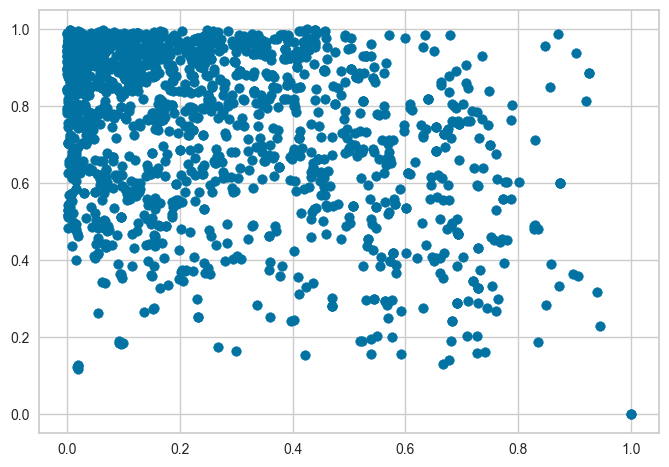

In [2388]:
plt.scatter(df["acousticness"],df["energy"]);

By subtracting energy from acousticness to create an "acoustic_energy balance" feature, we can capture a new aspect of the music that can help differentiate songs from one another. A higher positive value for this feature would indicate that the song is more acoustic, while a lower negative value would indicate that the song is more energetic.

The acoustic_energy balance can be a useful feature in music analysis and recommendation systems, as it can provide a new way of understanding and categorizing songs. For example, a user who is in the mood for more relaxing and mellow music might prefer songs with a higher positive value for this feature, while a user who is looking for more upbeat and high-energy music might prefer songs with a lower negative value.

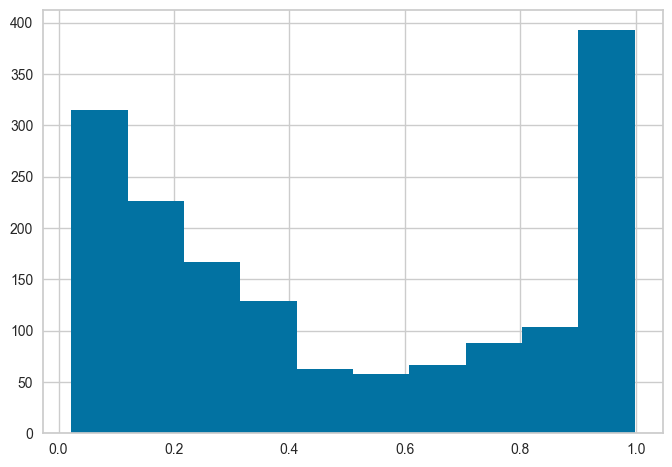

In [2389]:
plt.hist(df["liveness"]);

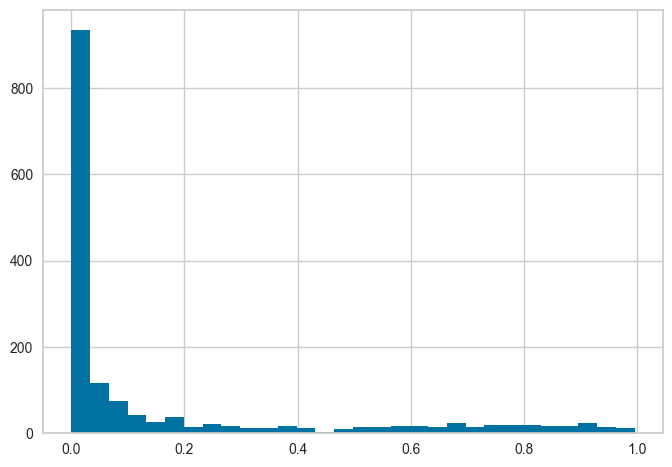

In [2390]:
plt.hist(df["instrumentalness"],bins=30);

 If a feature has more higher or lower values, the distance between points in that feature space will tend to be larger, which can have the following effects on k-means clustering:
 - Greater influence on cluster assignment
 - More spread out clusters
 - More sensitive to scaling

If we analyze the data there is a distinction between songs that are live and not live and the people who listen to live songs on Spotify can be distinct group with unique listening preferences. By creating a binary categorical variable, we can capture this distinction more effectively and create a variable that is closely aligned with the concept of liveness.

In [2391]:
df["acoustic_energy_bal"]= df["acousticness"] - df["energy"]
df['Live'] = pd.DataFrame(pd.cut(df["liveness"], [0, 0.38, 1], labels=[0,1]))
df['Instrumental'] = pd.DataFrame(pd.cut(df["instrumentalness"], [0, 0.18, 0.996], labels=[0,1]))

In [2392]:
relevent_columns = ["Live","acoustic_energy_bal","Instrumental","danceability","loudness","speechiness","tempo","valence","popularity","duration_ms"]

In [2393]:
df1 = df[relevent_columns]

In [2394]:
df1["Instrumental"]=df1["Instrumental"].fillna(0)

C:\Users\kushagra_sahu\AppData\Local\Temp\ipykernel_22344\3152912973.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [2395]:
df1.isnull().sum()

Live                   0
acoustic_energy_bal    0
Instrumental           0
danceability           0
loudness               0
speechiness            0
tempo                  0
valence                0
popularity             0
duration_ms            0
dtype: int64

In [2396]:
df1.head()

,Live,acoustic_energy_bal,Instrumental,danceability,loudness,speechiness,tempo,valence,popularity,duration_ms
0,1,-0.910118,1,0.463,-12.913,0.1100,118.001,0.0302,33,48640
1,1,-0.520740,1,0.326,-4.803,0.0759,131.455,0.3180,34,253173
2,1,-0.546529,1,0.386,-4.936,0.1150,130.066,0.3130,34,263160
3,1,-0.413264,0,0.369,-5.535,0.1930,132.994,0.1470,32,305880
4,1,-0.562626,0,0.303,-5.098,0.0930,130.533,0.2060,32,305106


In [2397]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1610 entries, 0 to 1609
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Live                 1610 non-null   category
 1   acoustic_energy_bal  1610 non-null   float64 
 2   Instrumental         1610 non-null   category
 3   danceability         1610 non-null   float64 
 4   loudness             1610 non-null   float64 
 5   speechiness          1610 non-null   float64 
 6   tempo                1610 non-null   float64 
 7   valence              1610 non-null   float64 
 8   popularity           1610 non-null   int64   
 9   duration_ms          1610 non-null   int64   
dtypes: category(2), float64(6), int64(2)
memory usage: 116.6 KB


In [2398]:
# sns.pairplot(df1)

In [2399]:
df1.isnull().sum()

Live                   0
acoustic_energy_bal    0
Instrumental           0
danceability           0
loudness               0
speechiness            0
tempo                  0
valence                0
popularity             0
duration_ms            0
dtype: int64

In [2400]:
# def getyear(x):
#     return x.year
# df["release_date"]=df["release_date"].apply(getyear)

In [2401]:
df1.describe()

,acoustic_energy_bal,danceability,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,-0.507172,0.468860,-6.971615,0.069512,126.082033,0.582165,20.788199,257736.488199
std,0.362205,0.141775,2.994003,0.051631,29.233483,0.231253,12.426859,108333.474920
min,-0.993624,0.104000,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000
25%,-0.805131,0.362250,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000
50%,-0.577405,0.458000,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000
75%,-0.300259,0.578000,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000
max,1.000000,0.887000,-1.014000,0.624000,216.304000,0.974000,80.000000,981866.000000


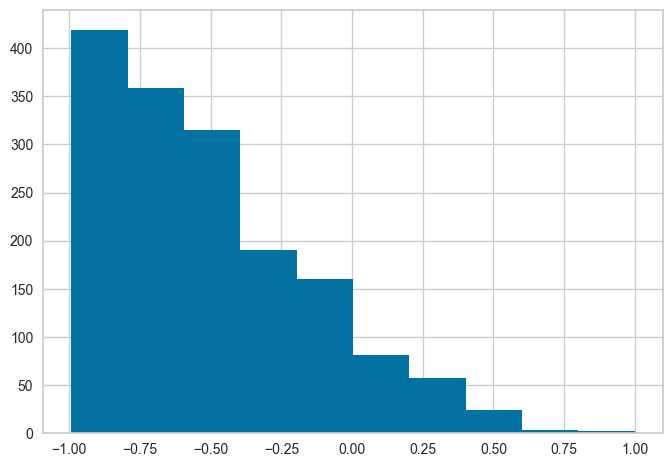

In [2402]:
plt.hist(df1["acoustic_energy_bal"]);

In [2403]:
df[df["Live"]==0]["popularity"].mean()

23.168525402726146

In [2404]:
df[df["Live"]==1]["popularity"].mean()

18.39601494396015

- Non-Live songs are more Popular

In [2405]:
df[df["Live"]==0]["loudness"].median()

-8.022

In [2406]:
df[df["Live"]==1]["loudness"].median()

-5.706

- Live songs are more loud

In [2407]:
df[df["Live"]==0]["acoustic_energy_bal"].mean()

-0.3891082268301042

In [2408]:
df[df["Live"]==1]["acoustic_energy_bal"].mean()

-0.6258234064711554

- Non-Live songs are more Acoustic but Live songs are more Energetic

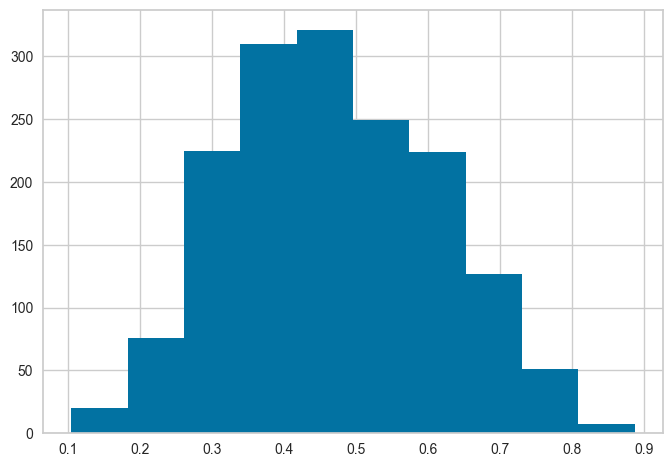

In [2409]:
plt.hist(df1["danceability"]);

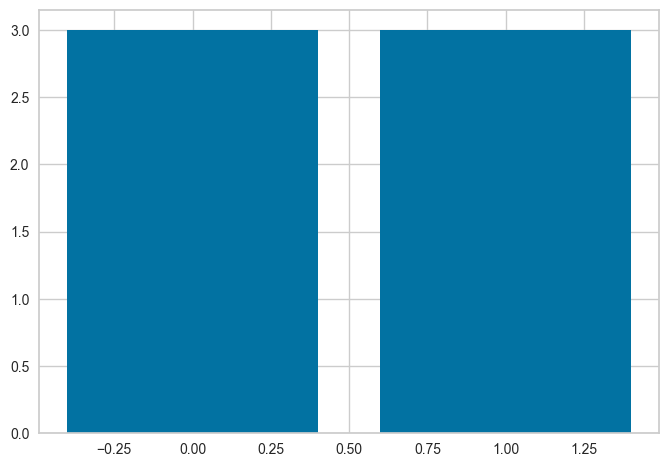

In [2410]:
plt.bar(df1["Instrumental"],3);

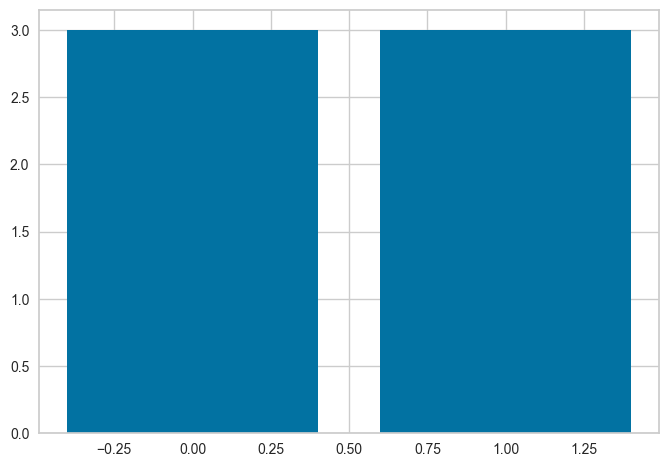

In [2411]:
plt.bar(df1["Live"],3);

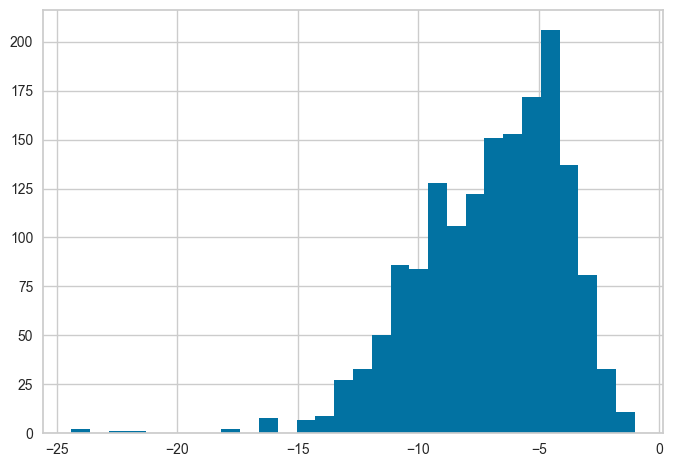

In [2412]:
plt.hist(df1["loudness"],bins=30);

(array([1.488e+03, 7.800e+01, 1.900e+01, 1.100e+01, 7.000e+00, 3.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([2.51038474e-11, 3.62765014e-02, 7.25530027e-02, 1.08829504e-01,
        1.45106005e-01, 1.81382507e-01, 2.17659008e-01, 2.53935509e-01,
        2.90212011e-01, 3.26488512e-01, 3.62765014e-01]),
 <BarContainer object of 10 artists>)

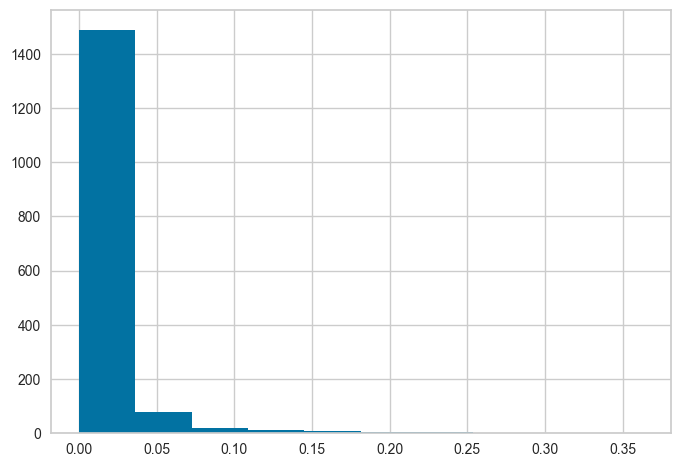

In [2413]:
plt.hist(np.exp(df1["loudness"]))

In [2414]:
df1["loudness"] = np.exp(df1["loudness"])

C:\Users\kushagra_sahu\AppData\Local\Temp\ipykernel_22344\1197624108.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



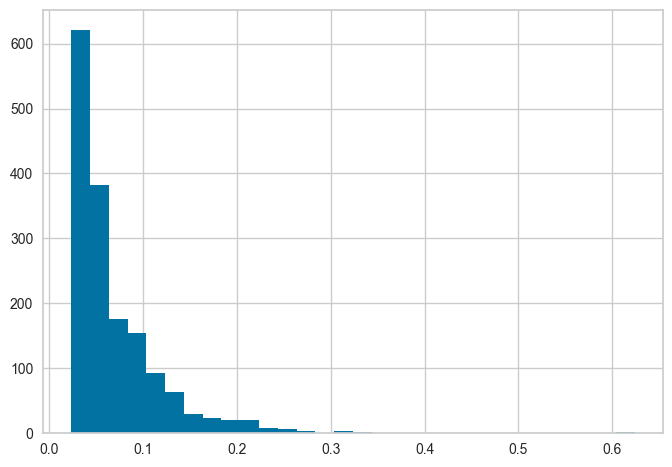

In [2415]:
plt.hist(df1["speechiness"],bins=30);

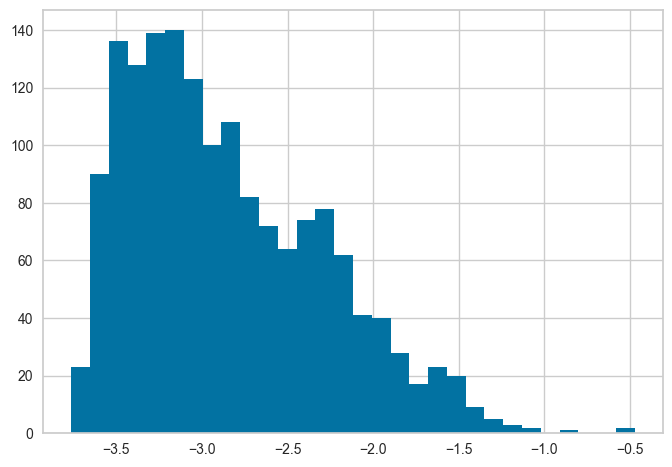

In [2416]:
plt.hist(np.log(df1["speechiness"]),bins=30);

In [2417]:
df1["speechiness"] = np.log(df1["speechiness"])

C:\Users\kushagra_sahu\AppData\Local\Temp\ipykernel_22344\2451322958.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



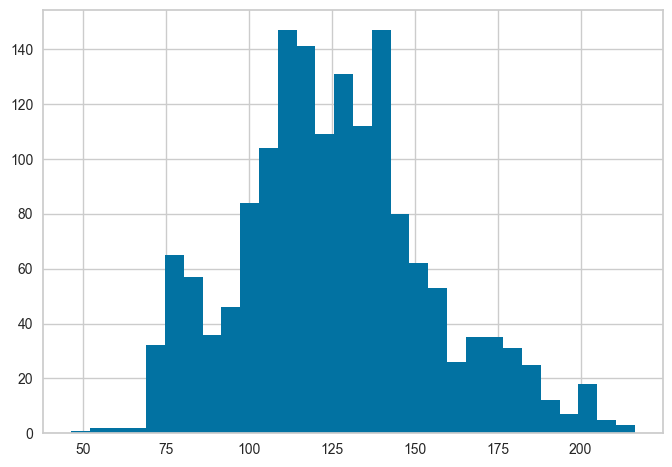

In [2418]:
plt.hist(df1["tempo"],bins=30);

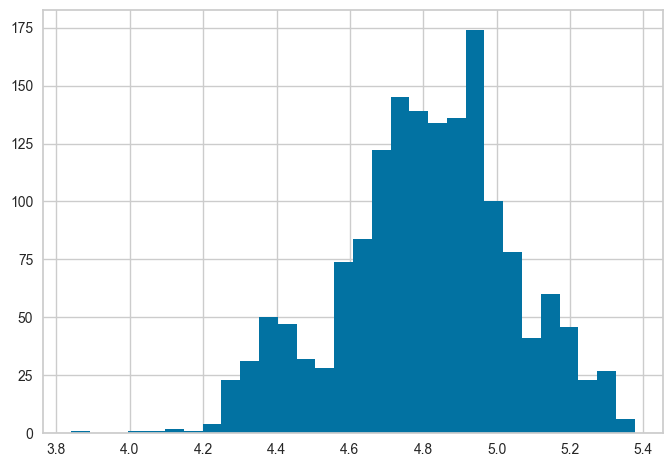

In [2419]:
plt.hist(np.log(df1["tempo"]),bins=30);

In [2420]:
df1["tempo"] = np.log(df1["tempo"])

C:\Users\kushagra_sahu\AppData\Local\Temp\ipykernel_22344\3809367195.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



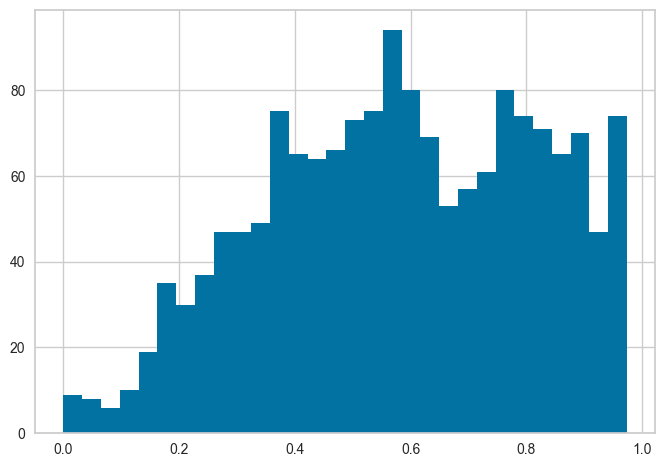

In [2421]:
plt.hist(df1["valence"],bins=30);

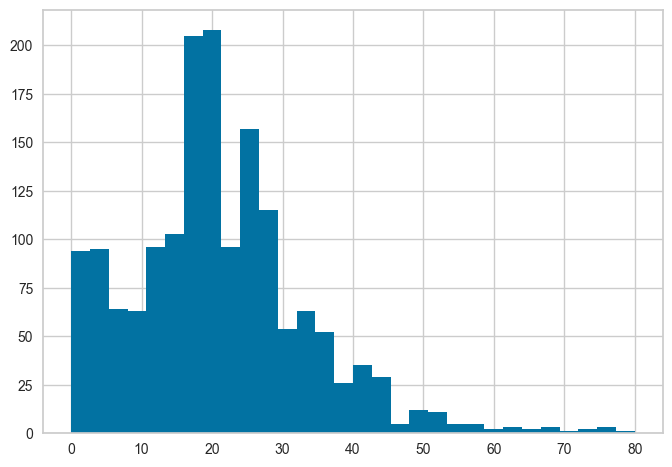

In [2422]:
plt.hist(df1["popularity"],bins=30);

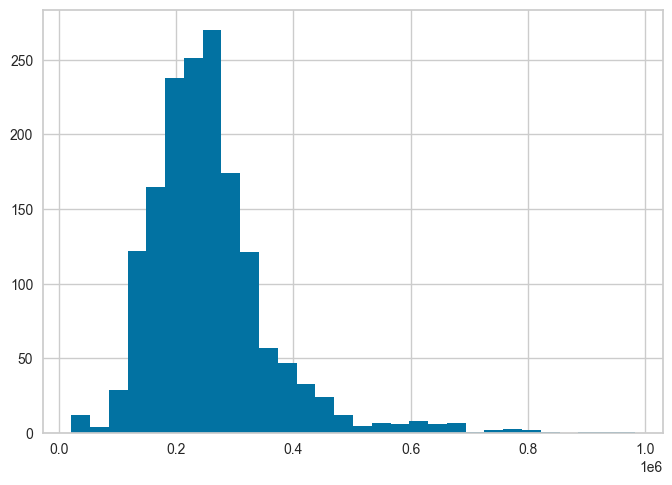

In [2423]:
plt.hist(df1["duration_ms"],bins=30);

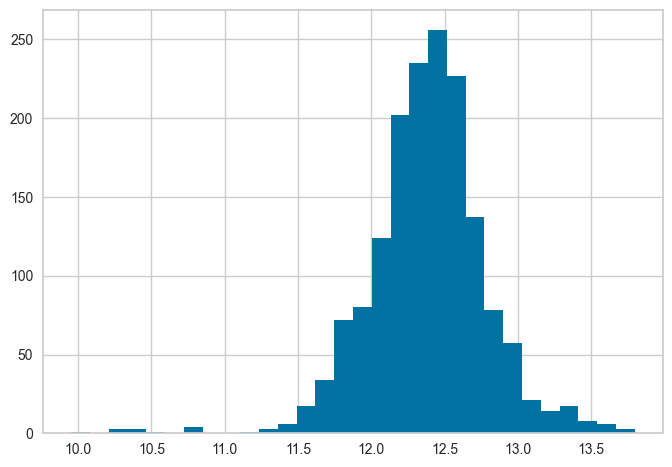

In [2424]:
plt.hist(np.log(df1["duration_ms"]),bins=30);

In [2425]:
df1["duration_ms"] = np.log(df1["duration_ms"])

C:\Users\kushagra_sahu\AppData\Local\Temp\ipykernel_22344\3619964942.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [2426]:
# x =df["release_date"]
# y =df["popularity"]
# sns.regplot(x=x,y=y,lowess=True,scatter=False);
# plt.title("Popularity over the years")


In [2427]:
# sns.regplot(x=df["release_date"],y=df["duration_ms"],lowess=True,scatter=False);
# plt.title("Duration of songs over the Years")

In [2428]:
# sns.regplot(x=df["release_date"],y=df["liveness"],lowess=True,scatter=False);
# plt.title("Live songs over the Years")

In [2429]:
# sns.regplot(x=df["release_date"],y=df["valence"],lowess=True,scatter=False);
# plt.title("Valence (Positive Tone) of songs over the Years")

In [2430]:
# sns.regplot(x=df["release_date"],y=df["acousticness"],lowess=True,scatter=False);
# plt.title("Acousticness of songs over the Years")

In [2431]:
# sns.regplot(x=df["release_date"],y=df["speechiness"],scatter=False,lowess=True);
# plt.title("Lyrical songs over the Years")

In [2432]:
# sns.regplot(x=df["release_date"],y=df["instrumentalness"],lowess=True,scatter=False);
# plt.title("Instrumental songs over the Years")

In [2433]:
# df1["duration_ms"] = df1["duration_ms"].apply(lambda x:x/60000)

In [2434]:

# sns.boxplot(df1["acousticness"])

In [2435]:
# df1 = df1[df1["acousticness"]<0.95]

<AxesSubplot: >

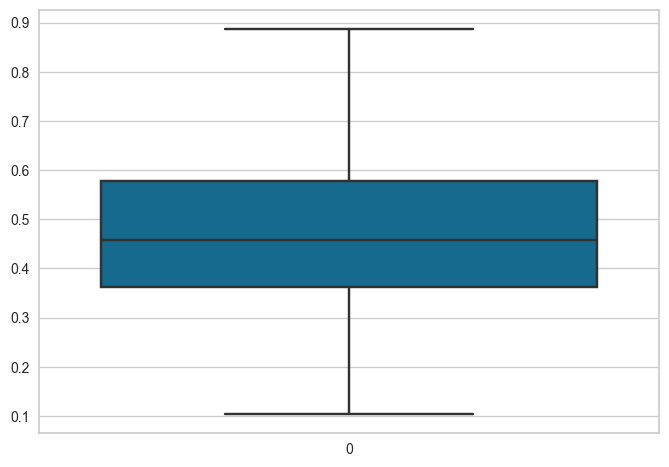

In [2436]:
sns.boxplot(df1["danceability"])

In [2437]:
# sns.boxplot(df1["liveness"])

<BarContainer object of 1610 artists>

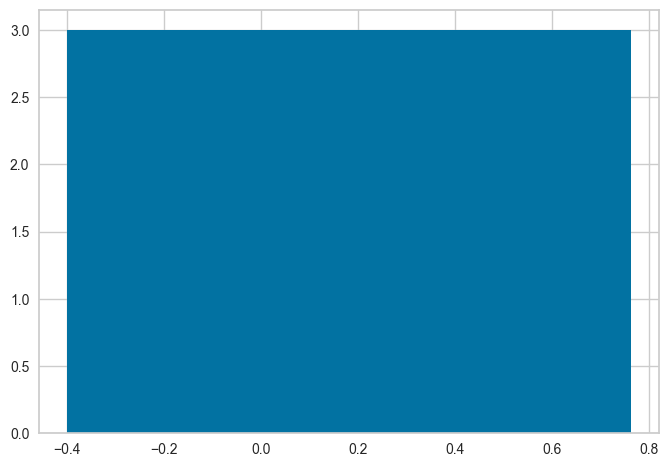

In [2438]:
plt.bar(df1["loudness"],3)

In [2439]:
df1 = df1[df1["loudness"]<0.2]

<AxesSubplot: >

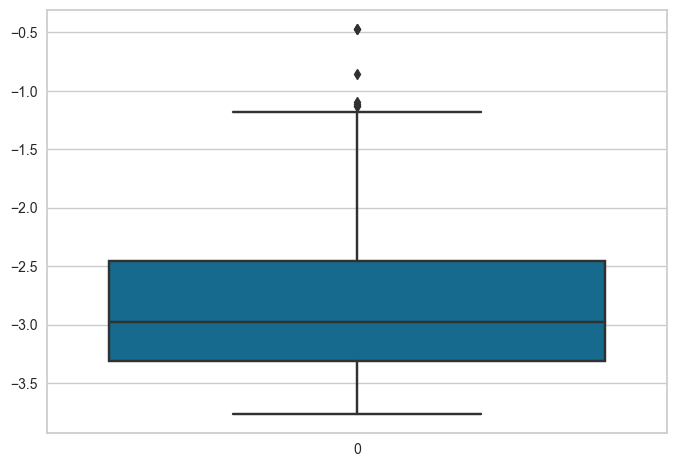

In [2440]:
sns.boxplot(df1["speechiness"])

In [2441]:
df1 = df1[df1["speechiness"]<-0.1]

<AxesSubplot: >

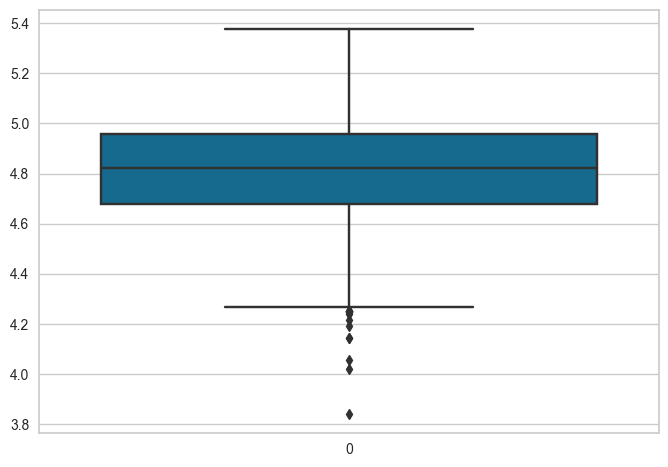

In [2442]:
sns.boxplot(df1["tempo"])

In [2443]:
# df1 = df1[df1["tempo"]>50]
# df1 = df1[df1["tempo"]<210]

In [2444]:
df1.shape

(1603, 10)

<AxesSubplot: >

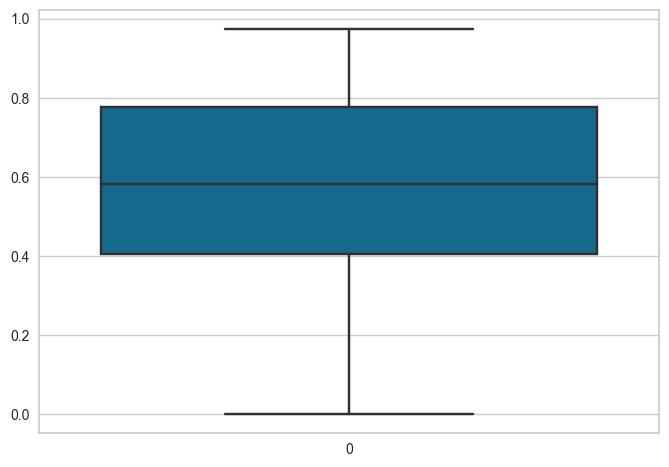

In [2445]:
sns.boxplot(df1["valence"])

<AxesSubplot: >

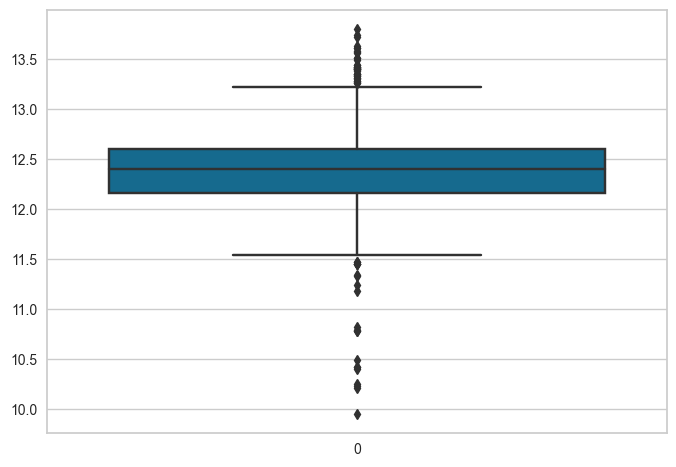

In [2446]:
sns.boxplot(df1["duration_ms"])

In [2447]:
# df1 = df1[df1["duration_ms"]>0.000178]

In [2448]:
df1.shape

(1603, 10)

In [2449]:
df1

,Live,acoustic_energy_bal,Instrumental,danceability,loudness,speechiness,tempo,valence,popularity,duration_ms
0,1,-0.910118,1,0.463,0.000002,-2.207275,4.770693,0.0302,33,10.792202
1,1,-0.520740,1,0.326,0.008205,-2.578339,4.878665,0.3180,34,12.441828
2,1,-0.546529,1,0.386,0.007183,-2.162823,4.868042,0.3130,34,12.480517
3,1,-0.413264,0,0.369,0.003946,-1.645065,4.890304,0.1470,32,12.630948
4,1,-0.562626,0,0.303,0.006109,-2.375156,4.871626,0.2060,32,12.628415
...,...,...,...,...,...,...,...,...,...,...
1605,0,-0.763971,0,0.466,0.000100,-3.148883,5.178069,0.9670,39,11.945227
1606,1,-0.600569,0,0.509,0.000081,-2.473373,4.804144,0.4460,36,12.410099
1607,0,-0.364528,0,0.790,0.000349,-2.631089,4.575072,0.8350,30,12.078694
1608,0,-0.253725,0,0.700,0.000070,-2.777400,4.631169,0.5320,27,11.709150


C:\Users\kushagra_sahu\AppData\Local\Temp\ipykernel_22344\1555091251.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

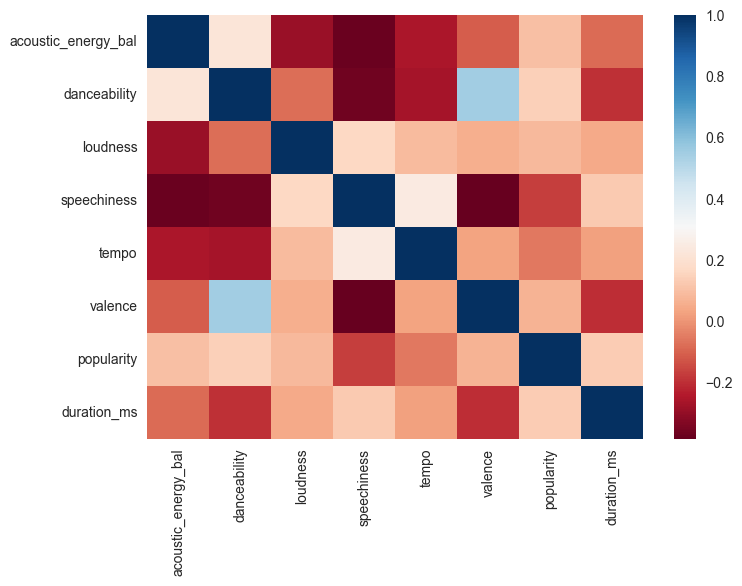

In [2450]:
sns.heatmap(df1.corr(),cmap="RdBu")

In [2451]:
# plt.scatter(df1["loudness"],np.exp(df1["energy"]),c=df1["tempo"],alpha=0.5)

In [2452]:
# plt.scatter(df1["tempo"],df1["loudness"],c=df1["energy"],alpha=0.5)

In [2453]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df1)
scaled_df = scaler.transform(df1)

In [2454]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5,random_state=0)
scaled_df = pd.DataFrame(pca.fit_transform(scaled_df))

In [2455]:
pca.explained_variance_

array([0.2790031 , 0.18742911, 0.0605774 , 0.04086631, 0.02425613])

In [2456]:
df1.isnull().sum()

Live                   0
acoustic_energy_bal    0
Instrumental           0
danceability           0
loudness               0
speechiness            0
tempo                  0
valence                0
popularity             0
duration_ms            0
dtype: int64

In [2457]:
from sklearn.cluster import KMeans

wcss = []

for i in range(9):
    model = KMeans(random_state=0,n_clusters=i+1,n_init='auto')
    model.fit(df1)
    wcss.append(model.inertia_)

In [7]:
plt.plot(wcss).xlabel("No. of Clusters").ylabel("WCSS")

NameError: name 'wcss' is not defined

In [2459]:
from sklearn.cluster import KMeans

wcss = []

for i in range(10):
    model = KMeans(random_state=0,n_clusters=i+1,n_init='auto')
    model.fit(scaled_df)
    wcss.append(model.inertia_)

Text(0, 0.5, 'WCSS')

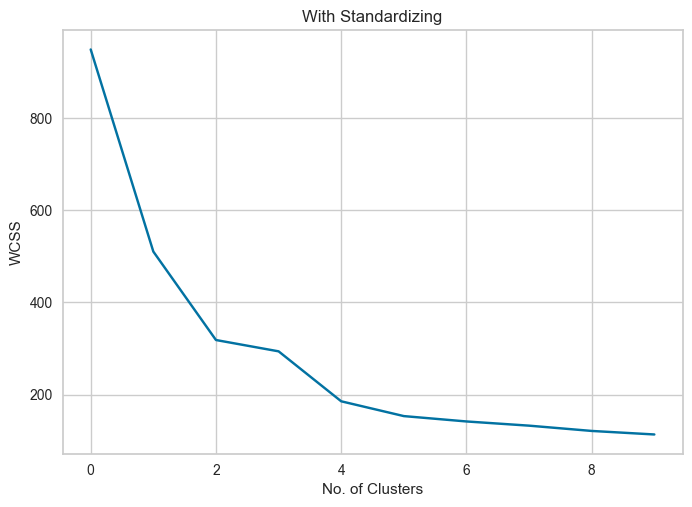

In [2460]:
plt.plot(wcss)
plt.title("With Standardizing")
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")

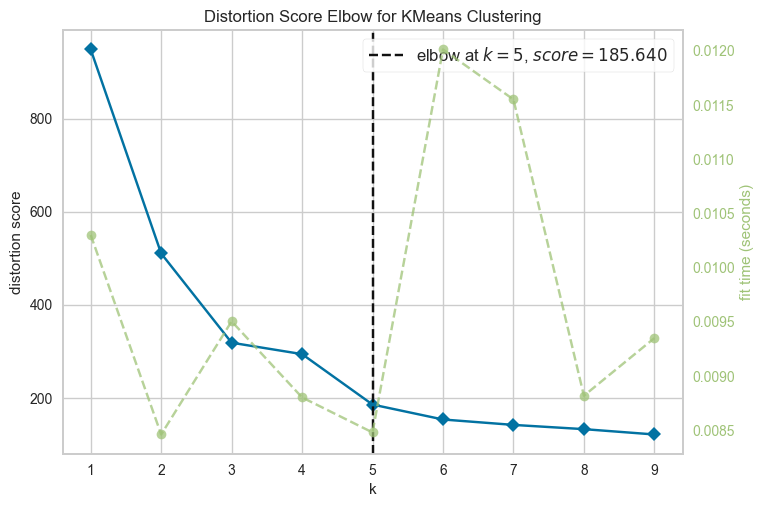

In [2461]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(init="k-means++",random_state = 0,n_init='auto')

visualizer = KElbowVisualizer(model, k = (1,10))

visualizer.fit(scaled_df)

visualizer.show()

plt.show();

In [2500]:
final_model = KMeans(random_state=0,n_clusters=4 )
final_model.fit(scaled_df)

c:\Users\kushagra_sahu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4, random_state=0)

In [2501]:
from sklearn.metrics import silhouette_score
silhouette_score = silhouette_score(scaled_df, final_model.labels_)
print("Silhuette score for kmeans model with 4 clusters using scaled data: "+str(silhouette_score))

Silhuette score for kmeans model with 4 clusters using scaled data: 0.5834465276805435


In [2499]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2,random_state=0)
df_2d = pd.DataFrame(pca.fit_transform(scaled_df),columns=["x","y"])

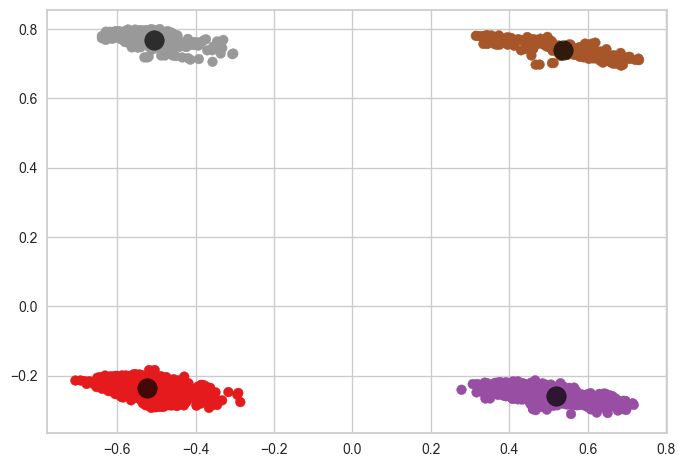

In [2465]:
# pca = PCA(n_components=2,random_state=0)
centers = pca.transform(final_model.cluster_centers_)
plt.scatter(df_2d["x"],df_2d["y"],c=final_model.labels_,cmap="Set1")

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.7);

In [2466]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3,random_state=0)

df_3d = pd.DataFrame(pca.fit_transform(scaled_df),columns=["x","y","z"])

In [2467]:
import plotly.express as px
fig = px.scatter_3d(df_3d,x="x",y="y",z="z",color=final_model.labels_)
fig.show()

The Rolling Stones are widely considered to be one of the most influential and important rock and roll bands of all time. Their music encompasses a wide range of styles, including rock and roll, blues, R&B, and country, among others. While IT IS DIFFICULT TO DIVIDE THEIR SONGS IN JUST THREE GENRES, here's an attempt based on the dominant musical influences in their music:

1. Rock and Roll: The Rolling Stones are often considered one of the pioneers of rock and roll music, and many of their songs are considered classic examples of the genre. Songs like "Jumpin' Jack Flash," "Brown Sugar," and "Start Me Up" are considered quintessential Rolling Stones rock and roll tracks.

2. Blues: The Rolling Stones have always been heavily influenced by the blues, and many of their early songs were covers of classic blues tracks. Their later work also reflects this influence, with songs like "Miss You," "Tumbling Dice," and "Love in Vain" showcasing the bluesy side of the band.

3. R&B: The Rolling Stones have also been heavily influenced by R&B music, especially in their early years. Songs like "Satisfaction," "The Last Time," and "It's Only Rock and Roll (But I Like It)" are classic examples of the R&B-influenced sound of the band.

These genres are not mutually exclusive and many of the Rolling Stones' songs incorporate elements from multiple genres. However, these are the three genres that are most often associated with their music.


In [2474]:
df1 = pd.DataFrame(df1)

In [2475]:
indices = df1.index

In [2476]:
df_filtered = df[df.index.isin(indices)]

In [2477]:
df_filtered.shape

(1603, 20)

In [2478]:
df_filtered["cohorts"] = final_model.predict(scaled_df)

C:\Users\kushagra_sahu\AppData\Local\Temp\ipykernel_22344\428610674.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [2479]:
df_filtered.head()

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,...,loudness,speechiness,tempo,valence,popularity,duration_ms,acoustic_energy_bal,Live,Instrumental,cohorts
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.082889,0.463,0.993007,0.996000,...,-12.913,0.1100,118.001,0.0302,33,48640,-0.910118,1,1,2
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.439633,0.326,0.960373,0.233000,...,-4.803,0.0759,131.455,0.3180,34,253173,-0.520740,1,1,2
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.418506,0.386,0.965035,0.400000,...,-4.936,0.1150,130.066,0.3130,34,263160,-0.546529,1,1,2
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.570419,0.369,0.983683,0.000107,...,-5.535,0.1930,132.994,0.1470,32,305880,-0.413264,1,0,1
4,Donâ€™t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.402409,0.303,0.965035,0.055900,...,-5.098,0.0930,130.533,0.2060,32,305106,-0.562626,1,0,1


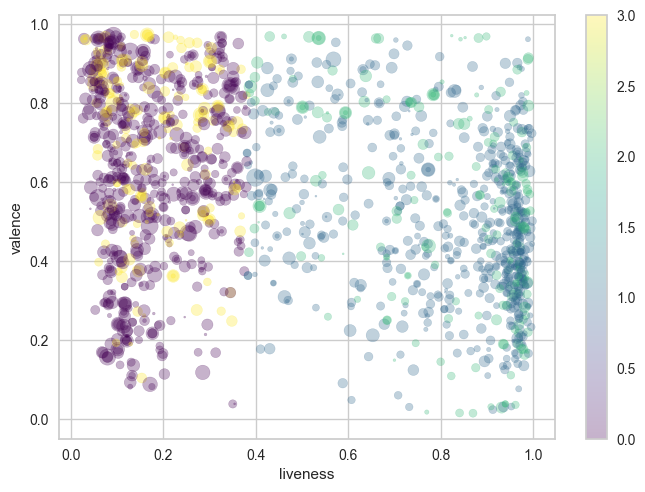

In [2480]:

x= df_filtered["liveness"]
y= df_filtered["valence"]
colors = df_filtered["cohorts"]
sizes = df_filtered["popularity"]*2
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.xlabel("liveness")
plt.ylabel("valence")
plt.colorbar();

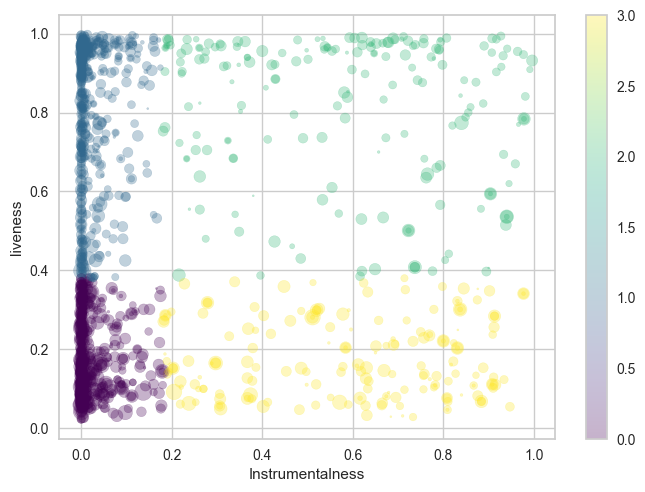

In [2481]:

y= df_filtered["liveness"]
x= df_filtered["instrumentalness"]
colors = df_filtered["cohorts"]
sizes = df_filtered["popularity"]*2
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.xlabel("Instrumentalness")
plt.ylabel("liveness")
plt.colorbar();

FOR LABELS - 0

In [2482]:
#MEAN VALUES FOR THE CATEGORY
df_filtered[df_filtered["cohorts"] == 0].describe().loc["mean"]

track_number                7.429739
acousticness                0.269216
danceability                0.536570
energy                      0.643562
instrumentalness            0.023139
liveness                    0.175438
loudness                   -7.995495
speechiness                 0.049610
tempo                     123.367408
valence                     0.630444
popularity                 23.485294
duration_ms            231460.982026
acoustic_energy_bal        -0.374346
cohorts                     0.000000
Name: mean, dtype: float64

In [2483]:
#TOP SONG OF THE CATEGORY
df_filtered[df_filtered["cohorts"] == 0]["name"].mode()

0                                          All Sold Out
1                                      Back Street Girl
2                           Brown Sugar - 2009 Remaster
3                                           Complicated
4                                            Connection
5                              Cool, Calm And Collected
6                        Let's Spend The Night Together
7                         Mercy Mercy - Remastered 2002
8                                     Miss Amanda Jones
9                                Mother's Little Helper
10                                         My Obsession
11                                       Please Go Home
12                                            Rocks Off
13                                         Ruby Tuesday
14                      She Said Yeah - Remastered 2002
15                                   She Smiled Sweetly
16                                  Take It Or Leave It
17                  Talkin' About You - Remaster

In [2484]:
#TOP ALBUM OF THE CATEGORY
df_filtered[df_filtered["cohorts"] == 0]["album"].mode()[0]

'Some Girls (Deluxe Version)'

FOR LABEL 1

In [2485]:
#MEAN VALUES FOR THE CATEGORY
df_filtered[df_filtered["cohorts"] == 1].describe().loc["mean"]

track_number                9.810084
acousticness                0.223833
danceability                0.406835
energy                      0.847537
instrumentalness            0.022207
liveness                    0.809709
loudness                   -6.013576
speechiness                 0.088161
tempo                     128.313933
valence                     0.504218
popularity                 18.068908
duration_ms            299412.505882
acoustic_energy_bal        -0.623704
cohorts                     1.000000
Name: mean, dtype: float64

In [2486]:
#TOP SONG OF THE CATEGORY
df_filtered[df_filtered["cohorts"] == 1]["name"].mode()

0    Honky Tonk Women - Live
1       Tumbling Dice - Live
Name: name, dtype: object

In [2487]:
#TOP ALBUM OF THE CATEGORY
df_filtered[df_filtered["cohorts"] == 1]["album"].mode()[0]

'Live Licks'

FOR LABEL 2

In [2488]:
#MEAN VALUES FOR THE CATEGORY
df_filtered[df_filtered["cohorts"] == 2].describe().loc["75%"]

track_number               14.000000
acousticness                0.392349
danceability                0.486500
energy                      0.969697
instrumentalness            0.790500
liveness                    0.964000
loudness                   -4.231000
speechiness                 0.102500
tempo                     144.134500
valence                     0.762500
popularity                 25.000000
duration_ms            289020.000000
acoustic_energy_bal        -0.524740
cohorts                     2.000000
Name: 75%, dtype: float64

In [2489]:
#TOP SONG OF THE CATEGORY
df_filtered[df_filtered["cohorts"] == 2]["name"].mode()

0             Brown Sugar - Live
1      Jumpin' Jack Flash - Live
2    Jumpinâ€™ Jack Flash - Live
3     Street Fighting Man - Live
Name: name, dtype: object

In [2490]:
#TOP ALBUM OF THE CATEGORY
df_filtered[df_filtered["cohorts"] == 2]["album"].mode()[0]

'Tattoo You (Super Deluxe)'

FOR LABEL 3

In [2491]:
#MEAN VALUES FOR THE CATEGORY
df_filtered[df_filtered["cohorts"] == 3].describe().loc["mean"]

track_number                7.756477
acousticness                0.290542
danceability                0.527808
energy                      0.720986
instrumentalness            0.593658
liveness                    0.179660
loudness                   -7.494912
speechiness                 0.053125
tempo                     122.804202
valence                     0.719254
popularity                 22.150259
duration_ms            217284.212435
acoustic_energy_bal        -0.430445
cohorts                     3.000000
Name: mean, dtype: float64

In [2492]:
#TOP SONG OF THE CATEGORY
df_filtered[df_filtered["cohorts"] == 3]["name"].mode()

0                 Bitch - 2009 Mix
1      Cry To Me - Remastered 2002
2    Gotta Get Away - Mono Version
3     Hitch Hike - Remastered 2002
4                    Tumbling Dice
Name: name, dtype: object

In [2493]:
#TOP ALBUM OF THE CATEGORY
df_filtered[df_filtered["cohorts"] == 3]["album"].mode()

0    Exile On Main Street (Bonus Track Version)
1                      Goats Head Soup (Deluxe)
2                               On Air (Deluxe)
3                   Some Girls (Deluxe Version)
Name: album, dtype: object

----------------------------------------------------------------------------------------

 - 0 - Acoustic Rock Enthusiasts - fans of thoughtful and introspective music that provides an emotional connection with the listener.
 - 1 - Fans(Country/Blues) - Fans of specific bands or artists who incorporate country and blues influences into their music
- 2 - Live Music Anthusiasts - individuals havig a deep appreciation for the energy, spontaneity, and unique experiences that can only be found at live performances, and   are often dedicated fans of specific artists or genres of music.
 - 3 - Instrumental Rock Enthusiasts - fans of music that uplifts their spirits and provides a sense of joy and positivity.



In [2502]:
label_map = {1:"Fans",3:"Instrumental Rock Enthusiasts",2:"Live Music Anthusiasts",0:"Acoustic Rock Enthusiasts"}

In [2503]:
df_final = df_filtered.copy()
df_final["cohorts"] = df_final["cohorts"].map(label_map)

In [2504]:
df_final.to_csv("songs with cohorts.csv")